# Final Notebook overview of the CTW Project 
This is the final cumulative notebook to gather together Mackenzie and Philip's different explorations of the WHO's life expectancy data set and how we interpreted and visualized it in a way we think would change the world. We first started by combining the separate csv's of each WHO Region and cleaning the columns to contain integers we could plot on continuous graphs

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

dfAfrica = pd.read_csv("africa.csv")
dfAmericas = pd.read_csv("americas.csv")
dfEMed = pd.read_csv("mediterranean.csv")
dfEurope = pd.read_csv("europe.csv")
dfSEAsia = pd.read_csv("asia.csv")
dfWPacific = pd.read_csv("pacific.csv")

df = [dfAfrica, dfAmericas, dfEMed, dfEurope, dfSEAsia, dfWPacific]

result = pd.concat(df)

In [18]:
def cleanData(data):
    data.AGEGROUP.replace(("AGE100PLUS", "AGE95-99", "AGE90-94", "AGE85-89", 
                             "AGE80-84", "AGE75-79", "AGE70-74", "AGE65-69", 
                             "AGE60-64", "AGE55-59", "AGE50-54", "AGE45-49", 
                             "AGE40-44", "AGE35-39", "AGE30-34", "AGE25-29", 
                             "AGE20-24", "AGE15-19", "AGE10-14", "AGE5-9", 
                             "AGE1-4", "AGELT1"), 
                          (100.0, 95.0, 90.0, 85.0, 80.0, 75.0, 70.0, 65.0, 60.0, 55.0, 50.0, 
                             45.0, 40.0, 35.0, 30.0, 25.0, 20.0, 15.0, 10.0, 5.0, 1.0, 0.5), 
                          inplace = True)
    
    data.SEX.replace(("BTSX", "FMLE", "MLE"), (2, 1, 0), inplace = True)
    
    # V not a continuous value, just for ease of referencing this column
    data.GHO.replace(("LIFE_0000000029", "LIFE_0000000030", "LIFE_0000000031", 
                      "LIFE_0000000032", "LIFE_0000000033", "LIFE_0000000034",
                      "LIFE_0000000035"),
                     (29, 30, 31, 32, 33, 34, 35), inplace = True)
    
    data.drop(["PUBLISHSTATE", "Low", "High", "Comments", "Display Value"], 
              inplace = True, axis = 1)

It's importanting to remember the meanings of the values in the GHO column:

29  nMx - age-specific death rate between ages x and x+n

30  nqx - probability of dying between ages x and x+n

31  lx - number of people left alive at age x

32  ndx - number of people dying between ages x and x+n

33  nLx - person-years lived between ages x and x+n

34  Tx - person-years lived above age x

35  ex - expectation of life at age x

In [19]:
cleanData(result)

We started by looking at categories 31 and 32 to compare similar units (or people) as time went by in each region. We isolated the GHO 31 and 32 columns with both sexes(for a more general data on a given region) and arranged both dataframes by ascending age groups for better plotting.

In [4]:
bothSex = result[result.SEX == 2]
GHO31 = bothSex[bothSex.GHO == 31]
GHO31.sort_index(by = ["AGEGROUP"], ascending = True, inplace = True)

GHO32 = bothSex[bothSex.GHO == 32]
GHO32.sort_index(by = ["AGEGROUP"], ascending = True, inplace = True)

africaGHO31 = GHO31[GHO31.REGION == "AFR"]
africaGHO32 = GHO32[GHO32.REGION == "AFR"]

/home/mackenzie/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()
/home/mackenzie/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return self.sort_values(by, axis=axis, ascending=ascending, inplace=inplace)
/home/mackenzie/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


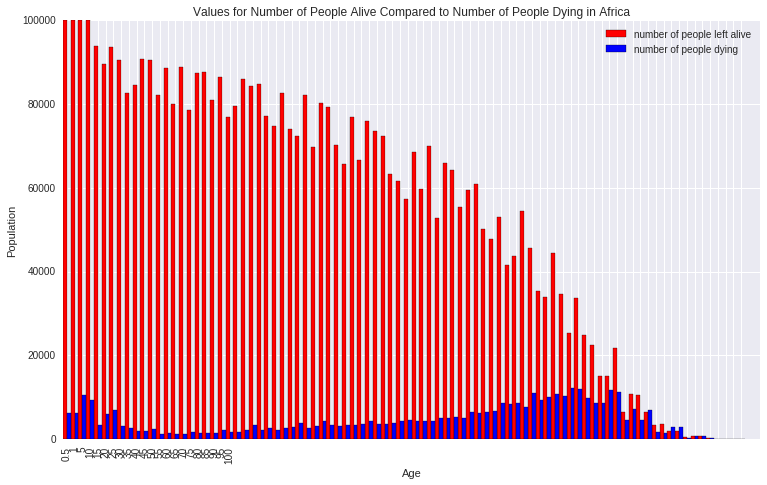

In [5]:
N = 88
ind = np.arange(N)
width = .50

fig, ax = plt.subplots()
rects1 = ax.bar(ind, africaGHO31.Numeric.values, width, color = 'r')
rects2 = ax.bar(ind + width, africaGHO32.Numeric.values, width, color = 'b')
ax.set_ylabel("Population")
ax.set_xlabel("Age")
ax.set_xticks(ind + width)
labels = ax.set_xticklabels(["0.5", "1", "5", "10", "15", "20", "25", "30", "35", "40", 
                             "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", 
                             "95", "100"])
ax.legend((rects1[0], rects2[0]), ('number of people left alive', 'number of people dying'))
fig.set_size_inches(12.5, 7.5)
plt.setp(labels, rotation = 90)
ax.set_title("Values for Number of People Alive Compared to Number of People Dying in Africa")

plt.show()

Unfortunately we couldn't totally fix the Age axis, but it should run 0.5 to 100. This trend seems vaguely reasonable, since it describes higher mortality for infants and older adults.The drop in population left alive also correlates reasonably, so we can be assured the data is reasonable. We went ahead and plotted this graph for the other 5 WHO regions.

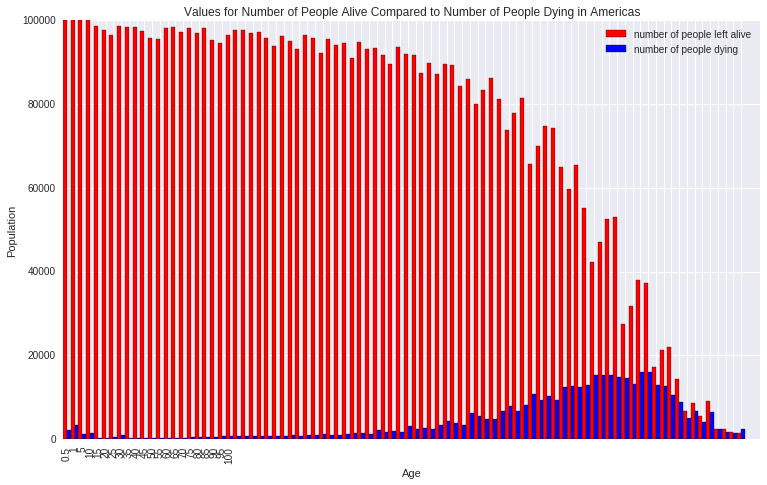

In [6]:
americaGHO31 = GHO31[GHO31.REGION == "AMR"]
americaGHO32 = GHO32[GHO32.REGION == "AMR"]

N = 88
ind = np.arange(N)
width = .50

fig, ax = plt.subplots()
rects1 = ax.bar(ind, americaGHO31.Numeric.values, width, color = 'r')
rects2 = ax.bar(ind + width, americaGHO32.Numeric.values, width, color = 'b')
ax.set_ylabel("Population")
ax.set_xlabel("Age")
ax.set_xticks(ind + width)
labels = ax.set_xticklabels(["0.5", "1", "5", "10", "15", "20", "25", "30", "35", "40", 
                             "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", 
                             "95", "100"])
ax.legend((rects1[0], rects2[0]), ('number of people left alive', 'number of people dying'))
fig.set_size_inches(12.5, 7.5)
plt.setp(labels, rotation = 90)
ax.set_title("Values for Number of People Alive Compared to Number of People Dying in Americas")

plt.show()

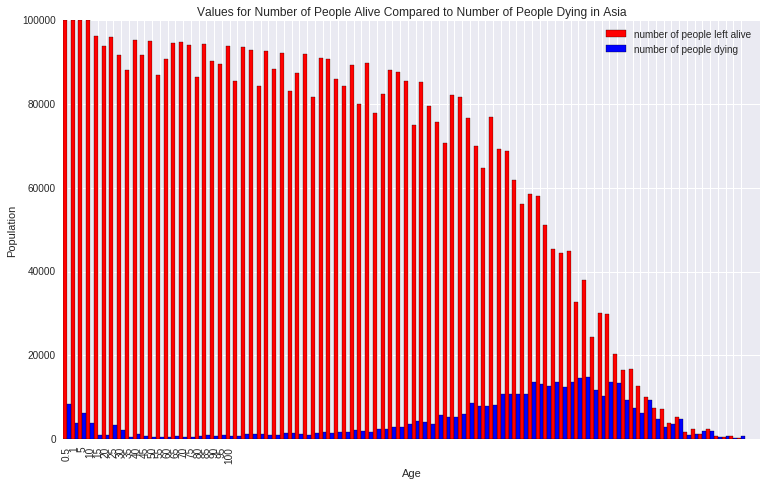

In [7]:
asiaGHO31 = GHO31[GHO31.REGION == "SEAR"]
asiaGHO32 = GHO32[GHO32.REGION == "SEAR"]

N = 88
ind = np.arange(N)
width = .50

fig, ax = plt.subplots()
rects1 = ax.bar(ind, asiaGHO31.Numeric.values, width, color = 'r')
rects2 = ax.bar(ind + width, asiaGHO32.Numeric.values, width, color = 'b')
ax.set_ylabel("Population")
ax.set_xlabel("Age")
ax.set_xticks(ind + width)
labels = ax.set_xticklabels(["0.5", "1", "5", "10", "15", "20", "25", "30", "35", "40", 
                             "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", 
                             "95", "100"])
ax.legend((rects1[0], rects2[0]), ('number of people left alive', 'number of people dying'))
fig.set_size_inches(12.5, 7.5)
plt.setp(labels, rotation = 90)
ax.set_title("Values for Number of People Alive Compared to Number of People Dying in Asia")

plt.show()

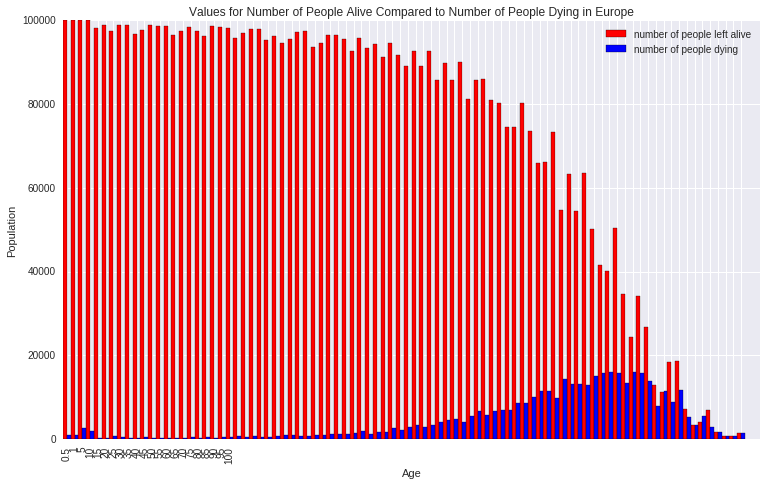

In [8]:
europeGHO31 = GHO31[GHO31.REGION == "EUR"]
europeGHO32 = GHO32[GHO32.REGION == "EUR"]

N = 88
ind = np.arange(N)
width = .50

fig, ax = plt.subplots()
rects1 = ax.bar(ind, europeGHO31.Numeric.values, width, color = 'r')
rects2 = ax.bar(ind + width, europeGHO32.Numeric.values, width, color = 'b')
ax.set_ylabel("Population")
ax.set_xlabel("Age")
ax.set_xticks(ind + width)
labels = ax.set_xticklabels(["0.5", "1", "5", "10", "15", "20", "25", "30", "35", "40", 
                             "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", 
                             "95", "100"])
ax.legend((rects1[0], rects2[0]), ('number of people left alive', 'number of people dying'))
fig.set_size_inches(12.5, 7.5)
plt.setp(labels, rotation = 90)
ax.set_title("Values for Number of People Alive Compared to Number of People Dying in Europe")

plt.show()

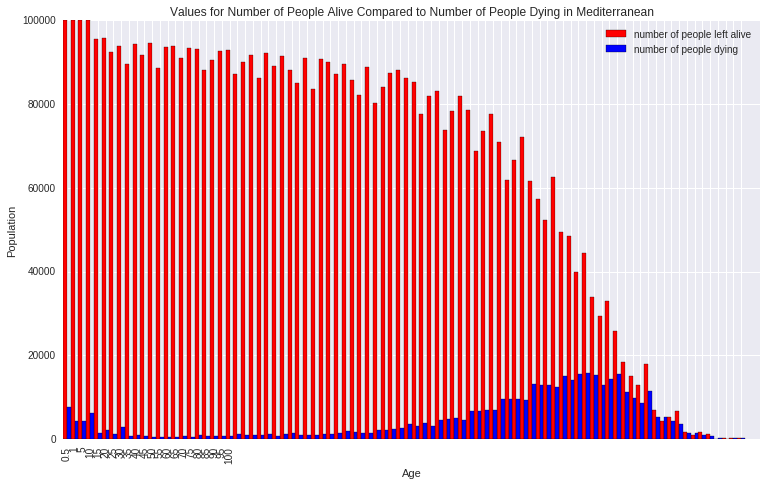

In [9]:
medGHO31 = GHO31[GHO31.REGION == "EMR"]
medGHO32 = GHO32[GHO32.REGION == "EMR"]

N = 88
ind = np.arange(N)
width = .50

fig, ax = plt.subplots()
rects1 = ax.bar(ind, medGHO31.Numeric.values, width, color = 'r')
rects2 = ax.bar(ind + width, medGHO32.Numeric.values, width, color = 'b')
ax.set_ylabel("Population")
ax.set_xlabel("Age")
ax.set_xticks(ind + width)
labels = ax.set_xticklabels(["0.5", "1", "5", "10", "15", "20", "25", "30", "35", "40", 
                             "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", 
                             "95", "100"])
ax.legend((rects1[0], rects2[0]), ('number of people left alive', 'number of people dying'))
fig.set_size_inches(12.5, 7.5)
plt.setp(labels, rotation = 90)
ax.set_title("Values for Number of People Alive Compared to Number of People Dying in Mediterranean")

plt.show()

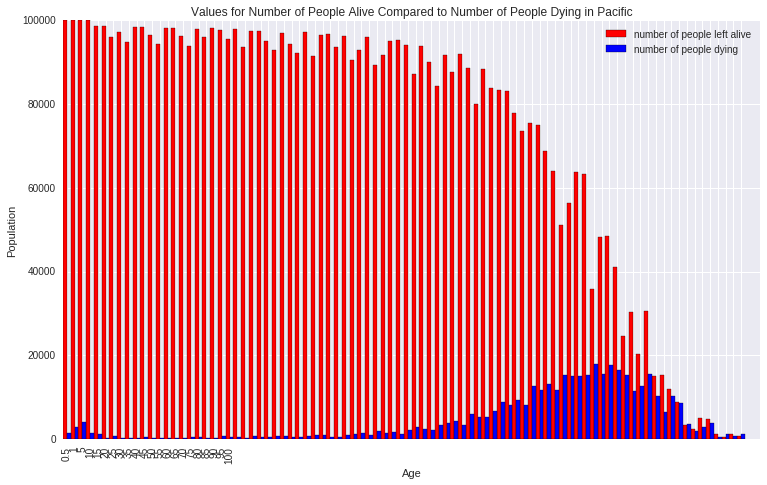

In [10]:
pacificGHO31 = GHO31[GHO31.REGION == "WPR"]
pacificGHO32 = GHO32[GHO32.REGION == "WPR"]

N = 88
ind = np.arange(N)
width = .50

fig, ax = plt.subplots()
rects1 = ax.bar(ind, pacificGHO31.Numeric.values, width, color = 'r')
rects2 = ax.bar(ind + width, pacificGHO32.Numeric.values, width, color = 'b')
ax.set_ylabel("Population")
ax.set_xlabel("Age")
ax.set_xticks(ind + width)
labels = ax.set_xticklabels(["0.5", "1", "5", "10", "15", "20", "25", "30", "35", "40", 
                             "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", 
                             "95", "100"])
ax.legend((rects1[0], rects2[0]), ('number of people left alive', 'number of people dying'))
fig.set_size_inches(12.5, 7.5)
plt.setp(labels, rotation = 90)
ax.set_title("Values for Number of People Alive Compared to Number of People Dying in Pacific")

plt.show()

Good. Now we have plots for each individual region, and we can now pull some insights; from a quick glance we can see that Africa has a fairly constant decline in number of people alive that becomes more steep towards the higher age values. The Americas and Europe regions have a very steep decline in people alive in later years, but the number of people dying otherwise stays very low. We can relate these trends toward infrastructure, especially health care facilities, in each region. 

We've also noticed the periodic skipping every three red or blue bars. This is because we kept all four sample years in each graph; the periodic jumps in population between two bars is actually the result of jumping between sampling years in age groups. To address this apparent difference in years, we decided to break down the data furthur and look at how year and region interact with population statistics. 

This next section separates region, year, and age group to create a 3D scatter to represent trends in life expectancy, or GHO value 35.

In [11]:
def regionSeparate(region):
    lifeExpec=result[result.GHO==35]#only looking at life expectancy values
    regionOnly = lifeExpec[lifeExpec.REGION==region]
    bSexLE= regionOnly[regionOnly.SEX == 2] # only looking at both sexes life expectancy
    #now to sort ages
    region_sorted_ages= bSexLE.AGEGROUP.sort_values()
    
    return bSexLE, region_sorted_ages

In [12]:
afdf, afAges = regionSeparate('AFR')#africa
amdf, amAges = regionSeparate('AMR')#americas
emdf, emAges = regionSeparate('EMR') #Eastern Mediterranean
eudf, euAges = regionSeparate('EUR') # europe
wpdf, wpAges = regionSeparate('WPR') #Western Pacific
seadf, seaAges = regionSeparate('SEAR') #South-East Asia

In [13]:
def graphExpectancies(country,df,ages):
    ax = Axes3D(plt.gcf())
    ax.scatter(
        df.YEAR.values,
        ages.values,
        df.Numeric.values
    )    
    ax.set_xlim(1989,2014)
    ax.set_ylim(0,110)
    ax.set_xlabel('Year')
    ax.set_ylabel('Age Group')
    ax.set_zlabel('Years Expected to live')

    plt.title(country +' Life expectancies across time by age')

    for ii in xrange(0,360,1):
        ax.view_init(elev=10., azim=ii)
        plt.savefig(country+"movie"+str(ii)+".png")
        
    plt.show()

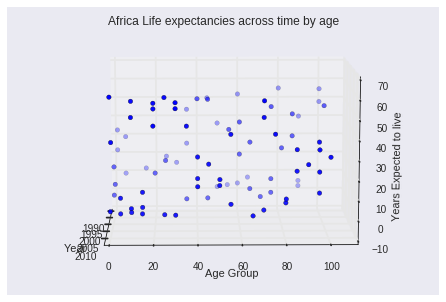

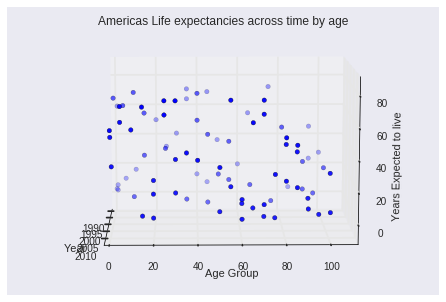

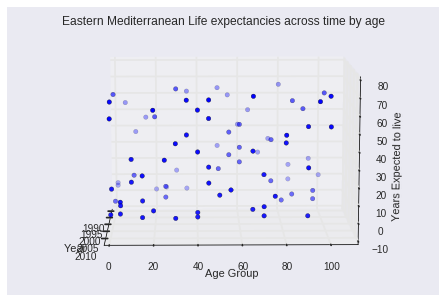

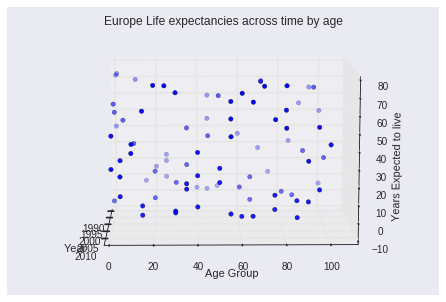

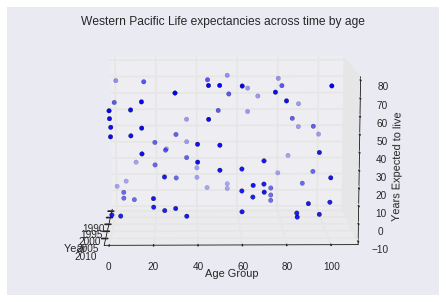

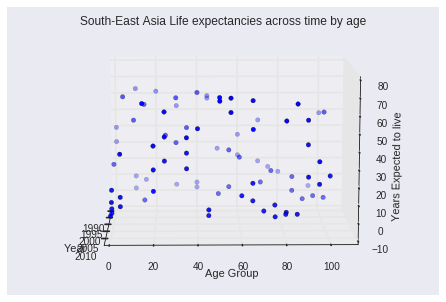

In [14]:
graphExpectancies('Africa',afdf,afAges)
graphExpectancies('Americas', amdf, amAges)
graphExpectancies('Eastern Mediterranean', emdf, emAges)
graphExpectancies('Europe', eudf, euAges)
graphExpectancies('Western Pacific', wpdf,wpAges)
graphExpectancies('South-East Asia', seadf, seaAges)

The graphExpectancies function creates 360 snapshots of each graph that we compiled into gifs that can be found on the github. We found that the 3D representations did address multiple factors and created dynamic visualizations that were interesting from a software engineering standpoint, but the gifs are difficult to interpret and probably not the best at educating the larger public to the inequalities of life expectancy across WHO regions.

We decided to go back to two dimensions to look more clearly at GHO category 35.

In [20]:
def regionYearSeparate(region,cat,age):
    #select category values
    lifeExpec=result[result.GHO==cat]
    #filter for region
    regionOnly = lifeExpec[lifeExpec.REGION==region]
    # only looking at both sexes life expectancy
    bSexLE= regionOnly[regionOnly.SEX == 2]
    #filter by age groups 
    agefilt = bSexLE[bSexLE.AGEGROUP== age]
    agefilt.sort_index(by = ["YEAR"], ascending = True, inplace = True)
    return agefilt

In [21]:
category =35
age =0.5
afdf = regionYearSeparate('AFR',category,age)
amdf = regionYearSeparate('AMR',category,age)
emdf = regionYearSeparate('EMR',category,age) #Eastern Mediterranean
eudf = regionYearSeparate('EUR',category,age) # europe
wpdf = regionYearSeparate('WPR',category,age) #Western Pacific
seadf = regionYearSeparate('SEAR',category,age) #South-East Asia

/home/mackenzie/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
/home/mackenzie/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return self.sort_values(by, axis=axis, ascending=ascending, inplace=inplace)


In [22]:
#put in year, numeric value 
def scattersPlots(age,title,africadf,americadf,emeddf,eurodf,wpacifdf,seasiadf):
    fig = plt.figure()
    ax1=fig.add_subplot(111)

    ax1.scatter(africadf.YEAR.values,africadf.Numeric.values, c='b', label ='Africa')
    ax1.scatter(americadf.YEAR.values, americadf.Numeric.values, c= 'r', label = 'Americas')
    ax1.scatter(emeddf.YEAR.values, emeddf.Numeric.values, c= 'y', label = 'E Mediterranean')
    ax1.scatter(eurodf.YEAR.values, eurodf.Numeric.values, c= 'c', label = 'Europe')
    ax1.scatter(wpacifdf.YEAR.values, wpacifdf.Numeric.values, c= 'g', label = 'W Pacific')
    ax1.scatter(seasiadf.YEAR.values, seasiadf.Numeric.values, c= 'm', label = 'SE Asia')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(title)
    plt.show()

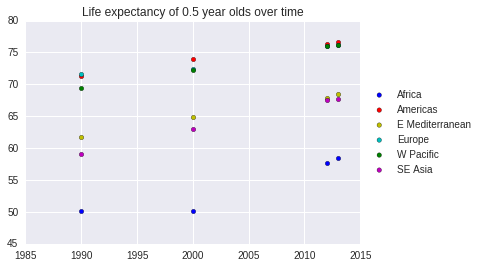

In [23]:
scattersPlots(age, 'Life expectancy of '+ str(age)+' year olds over time',afdf,amdf,emdf,eudf,wpdf,seadf)

Every life expectancy plot (GHO 35)  showed that life expectancy follows more or less the exact same trend in every region. Moreover, regions tend to maintain the same dispersion with Africa as the region with the smallest life expectancy and the Americas with the greatest. We wanted to engage audiences in a new, educational way so we looked for GHO categories with greater variance in trends.

We found Probability of dying before the next age group is much more interesting and looks to vary more here than in other categories. I see switching between europe and america as regions where you are less likely to die in the next five years. It could even be interesting to use this information to determine at which age in a given region at a given year a person is most likely to die. So next I'm going to restructure the data to stay on a single region and year and graph age groups on the x axis and probability of dying on the y axis. 

need to edit this for tense agreement. A LOTOOOO